Este ejemplo esta basado en [MedClipModel](https://github.com/RyanWangZf/MedCLIP?tab=readme-ov-file#medclip-for-prompt-based-classification), el cual toma una imagen y unos prompts artificales que simulan la descripcion de un "medico" sobre la imagen y mira cual de las clases de esos prompts esta mas alineada con la imagen de entrada. 

In [ ]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor
from medclip import PromptClassifier

In [115]:
processor = MedCLIPProcessor()

c:\Users\opera\miniforge3\envs\medclip\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [117]:
processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True)
clf.cuda()

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'c

load model weight from: ./pretrained/medclip-vit


PromptClassifier(
  (model): MedCLIPModel(
    (vision_model): MedCLIPVisionModelViT(
      (model): SwinModel(
        (embeddings): SwinEmbeddings(
          (patch_embeddings): SwinPatchEmbeddings(
            (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
          )
          (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (encoder): SwinEncoder(
          (layers): ModuleList(
            (0): SwinStage(
              (blocks): ModuleList(
                (0-1): 2 x SwinLayer(
                  (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
                  (attention): SwinAttention(
                    (self): SwinSelfAttention(
                      (query): Linear(in_features=96, out_features=96, bias=True)
                      (key): Linear(in_features=96, out_features=96, bias=True)
                      (value): Linear(in_features=96, out_features=9

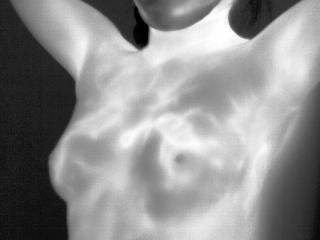

In [118]:
from PIL import Image
# Cargar la imagen y asegurarse de que sea RGB
image = Image.open(r"C:\Users\opera\OneDrive\Documentos\GitHub\BreastCATT\IIR0001_oblleft.jpg")
image

In [119]:
inputs = processor(images=image, return_tensors="pt")

In [120]:
generatep_romps = {'Malignant' : ['Focal hyperthermia, irregular borders, malignant vascular pattern.', 'Asymmetric thermal hotspot, distorted flow, clearly malignant.', 'Sharp thermal gradient, abnormal signals, diagnostic of malignant lesion.'],
                    'Benign' : ['Uniform thermal distribution, regular borders, benign pattern.', 'Symmetric thermal hotspot, normal flow, benign.', 'Smooth thermal gradient, regular signals, indicative of benign lesion.'],}

In [121]:
from medclip.prompts import process_class_prompts
procees_cls = process_class_prompts(generatep_romps)
print(procees_cls)

defaultdict(None, {'Malignant': {'input_ids': tensor([[  101, 17811,   177, 24312,  8420,  8191,   117, 12692,  6641,   117,
         12477,  2646, 15454, 26557,  4844,   119,   102,     0],
        [  101,  1112, 17162, 13689, 10735,  2633, 20080,  3329,   117, 21387,
          4235,   117,  3817, 12477,  2646, 15454,   119,   102],
        [  101,  4295, 10735, 19848,   117, 22832,  7981,   117, 20346,  1104,
         12477,  2646, 15454,  8241,  1988,   119,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}, 'Benign': {'input_ids': tensor([[  101,  6029, 10735,  3735,   117,  2366,  6641,   117, 261

In [122]:
inputs['prompt_inputs'] = procees_cls

In [123]:
# make classification
output = clf(**inputs)
print(output)

{'logits': tensor([[0.0218, 0.0319]], device='cuda:0', grad_fn=<StackBackward0>), 'class_names': ['Malignant', 'Benign']}


In [124]:
import torch
torch.softmax(output['logits'], dim=1)

tensor([[0.4975, 0.5025]], device='cuda:0', grad_fn=<SoftmaxBackward0>)